In [932]:
#### Basic:
import pandas as pd
import numpy as np
from datetime import date
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from numpy import log

#Plots:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
#import cufflinks as cf

#Models:
from sklearn.preprocessing import (KBinsDiscretizer, MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder)#if used without index well set, makes null values

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

#import kmodes.kmodes as km
from scipy import stats
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.preprocessing import MinMaxScaler #if used without index well set, makes null values
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import kmodes.kmodes as km
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Evaluation
from sklearn.metrics import f1_score


# Importação, exploração e pré-tratamento
Objetivo: buscar problemas no dataset survey da empresa BookMe para pré tratá-lo

In [933]:
df = pd.read_csv("HR_DS.csv")

In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [935]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [936]:
df.drop(['EmployeeCount', 'Over18','PerformanceRating', 'StandardHours'], axis=1, inplace=True)

In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [938]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [939]:
df.head(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,12,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,13,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,20,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,22,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,21,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,13,2,2,17,3,2,7,7,7,7


In [940]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [941]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Concerning the variables skewness, we can conclude the following:

High skewness (higher than |1.0|): TotalWorkingYears, YearsAtCompany ,YearsSinceLastPromotion, JobLevel,MonthlyIncome,NumCompaniesWorked
 
PerformanceRating just have two different values


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

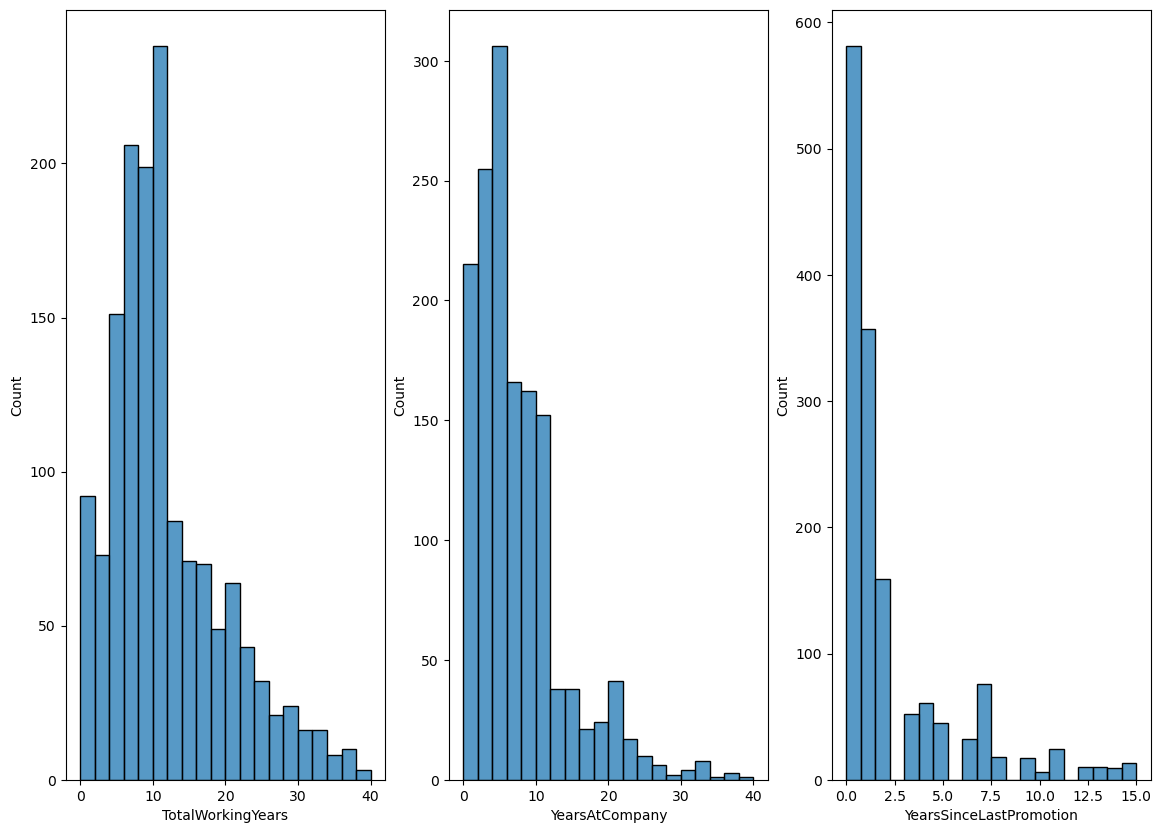

In [942]:
fig, axes = plt.subplots(1,3, figsize = (14,10))
sns.histplot(ax = axes[0], data = df, x = 'TotalWorkingYears', bins = 20)
sns.histplot(ax = axes[1], data = df, x = 'YearsAtCompany', bins = 20)
sns.histplot(ax = axes[2], data = df, x = 'YearsSinceLastPromotion', bins = 20)


#High correlations variables that we will widhraw 

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Count'>

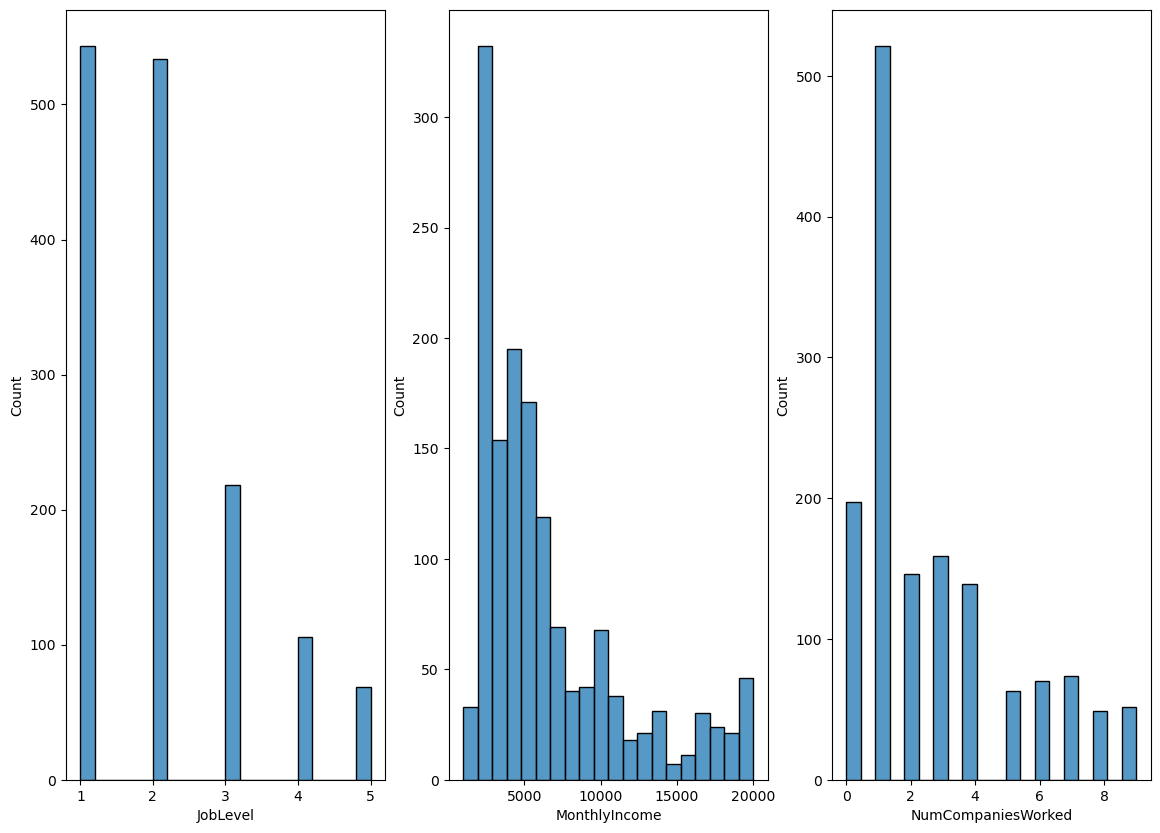

In [943]:
fig, axes = plt.subplots(1,3, figsize = (14,10))
sns.histplot(ax = axes[0], data = df, x = 'JobLevel', bins = 20)
sns.histplot(ax = axes[1], data = df, x = 'MonthlyIncome', bins = 20)
sns.histplot(ax = axes[2], data = df, x = 'NumCompaniesWorked', bins = 20)


most of people are in job 1 and 2. from 3 to 5 there is a decrese trend. montlhy income follows the same trend and can be related(figure below).

a lot of employees worked in 2 companies

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

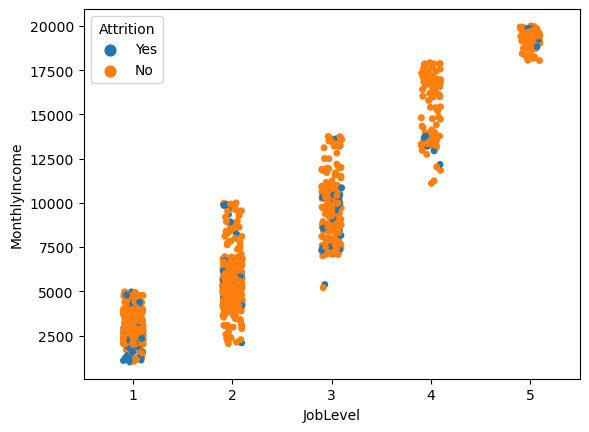

In [944]:
sns.stripplot(data=df, x='JobLevel', y="MonthlyIncome", hue="Attrition")

<AxesSubplot:>

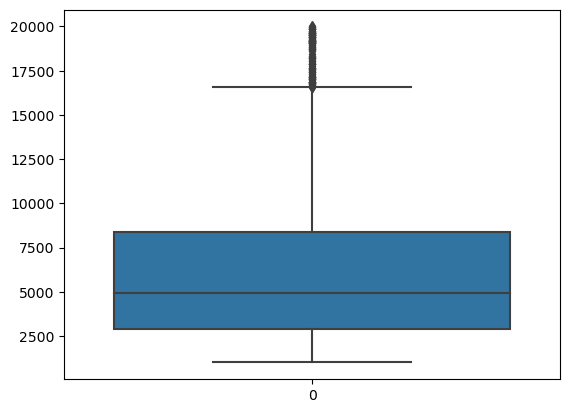

In [945]:
sns.boxplot(data=df['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

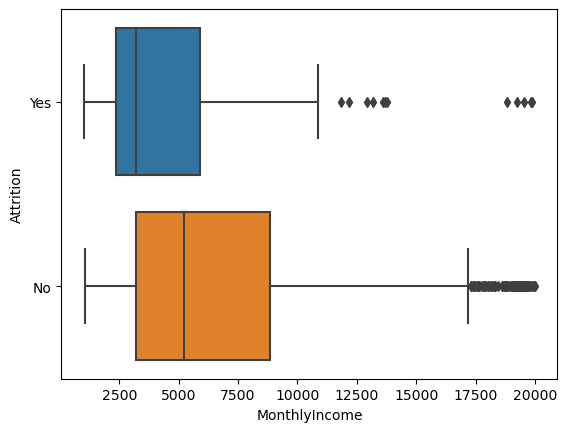

In [946]:
sns.boxplot(data=df, x='MonthlyIncome', y='Attrition')

<AxesSubplot:>

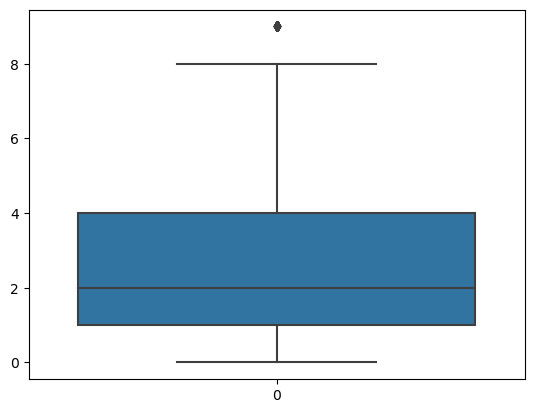

In [947]:
sns.boxplot(data=df['NumCompaniesWorked'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

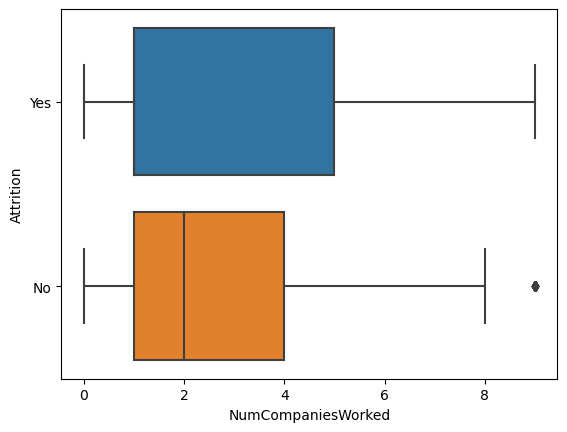

In [948]:
sns.boxplot(data=df, x='NumCompaniesWorked', y='Attrition')

<AxesSubplot:>

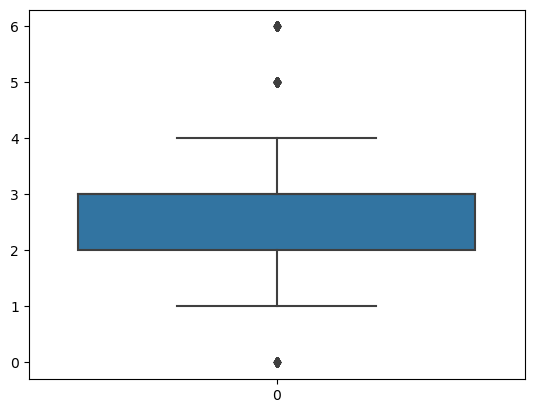

In [949]:
sns.boxplot(data=df['TrainingTimesLastYear'])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Attrition'>

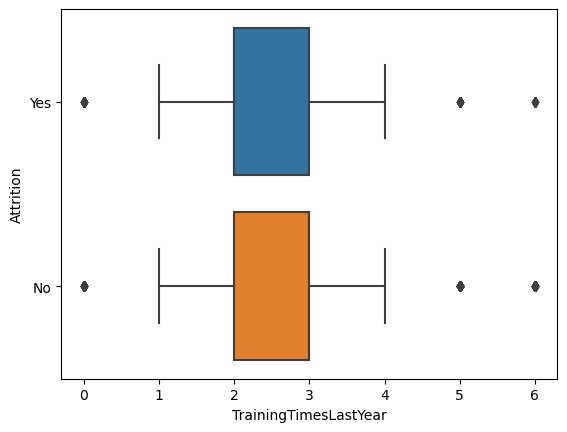

In [950]:
sns.boxplot(data=df, x='TrainingTimesLastYear', y='Attrition')

<AxesSubplot:>

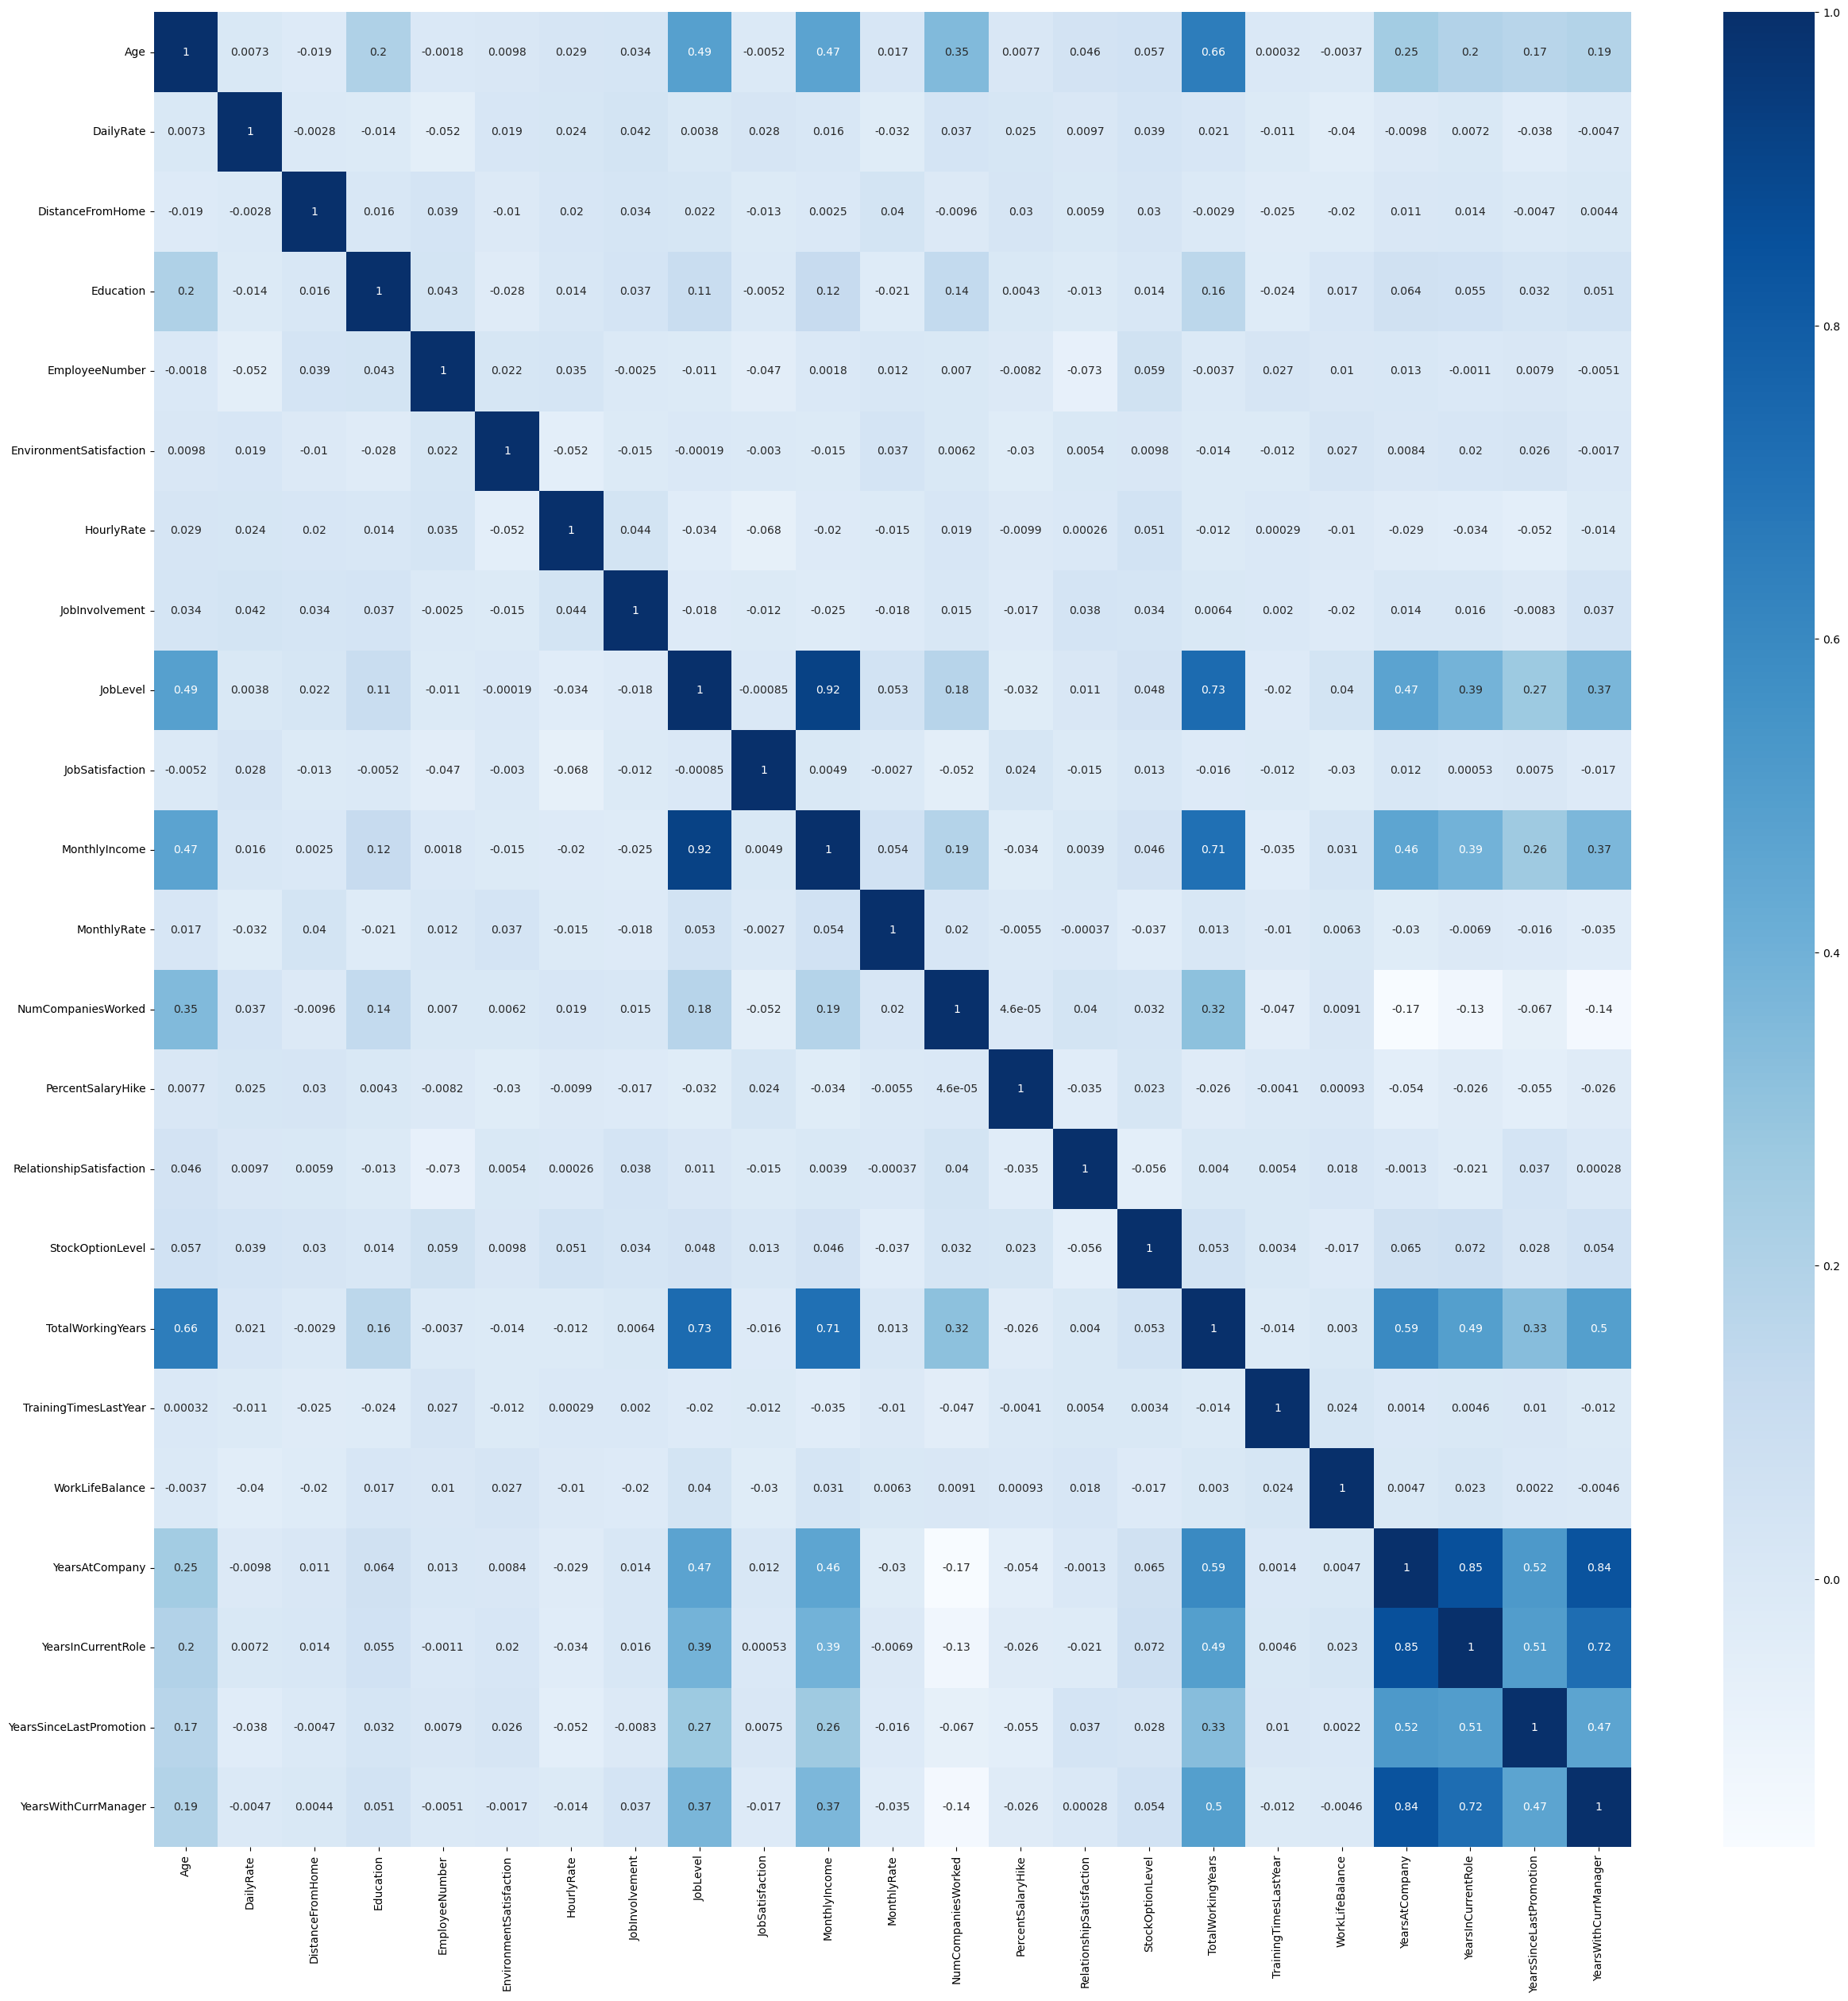

In [951]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(30,30))
sns.heatmap(df_corr, annot=True, cmap="Blues")


In [952]:
#highly correlated features

df.drop(['YearsWithCurrManager','YearsInCurrentRole','TotalWorkingYears'], axis=1, inplace=True)

<AxesSubplot:>

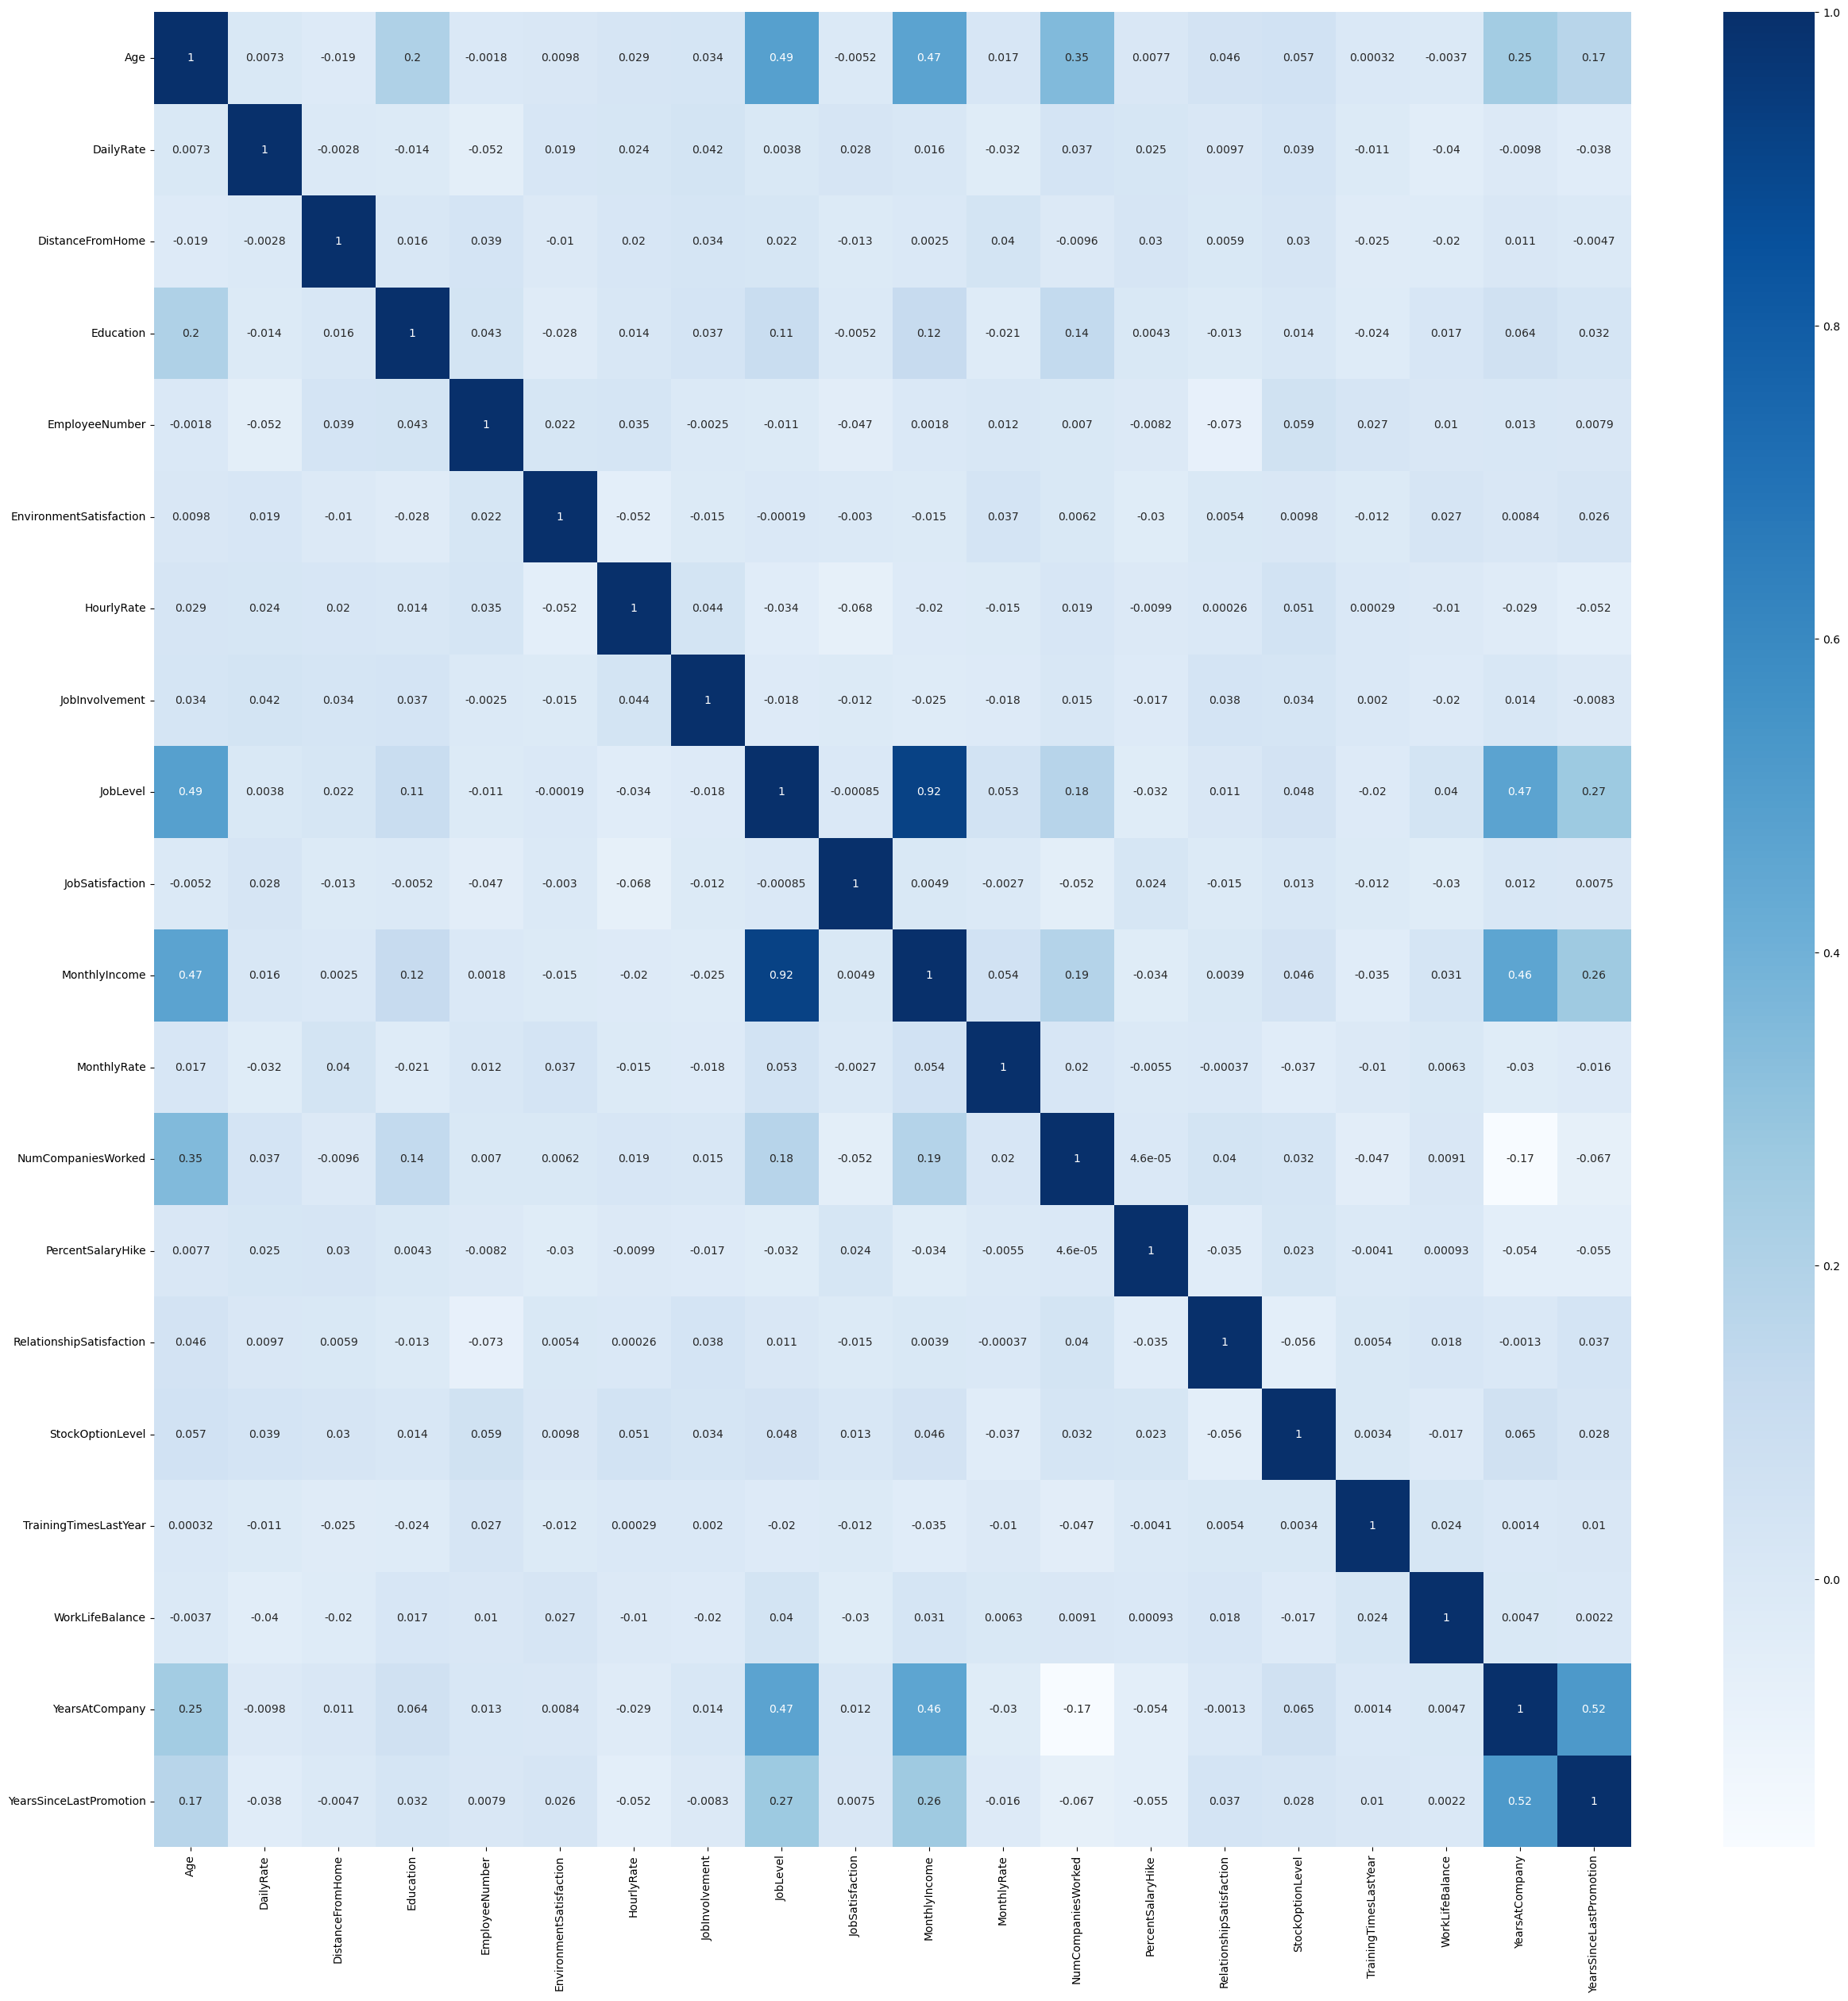

In [953]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(30,30))
sns.heatmap(df_corr, annot=True, cmap="Blues")


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

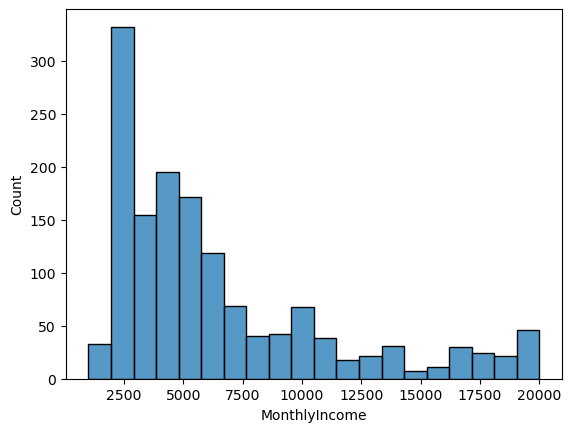

In [954]:
sns.histplot(data=df, x="MonthlyIncome")

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

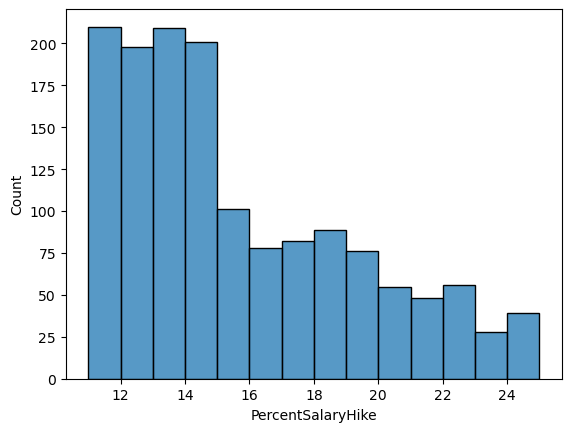

In [955]:
sns.histplot(data=df, x="PercentSalaryHike")

In [956]:
#lOG - correcting skewness


df["MonthlyIncome_log"] = log(df["MonthlyIncome"])
df["PercentSalaryHike_log"] = log(df["PercentSalaryHike"])

<AxesSubplot:>

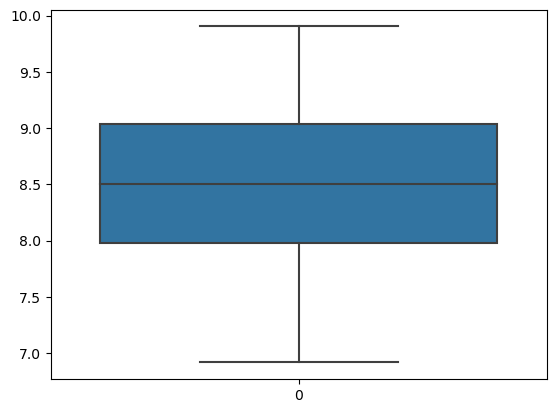

In [957]:
sns.boxplot(data=df['MonthlyIncome_log'])

<AxesSubplot:xlabel='MonthlyIncome_log', ylabel='Count'>

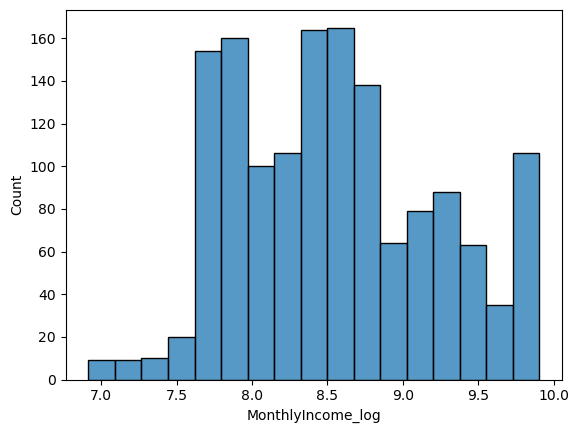

In [958]:
sns.histplot(data=df, x="MonthlyIncome_log")

<AxesSubplot:>

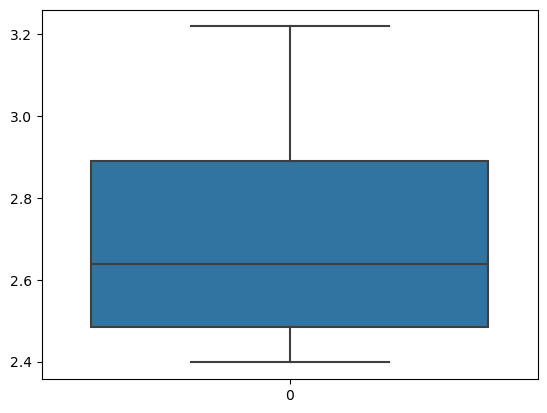

In [959]:
sns.boxplot(data=df['PercentSalaryHike_log'])

<AxesSubplot:xlabel='PercentSalaryHike_log', ylabel='Count'>

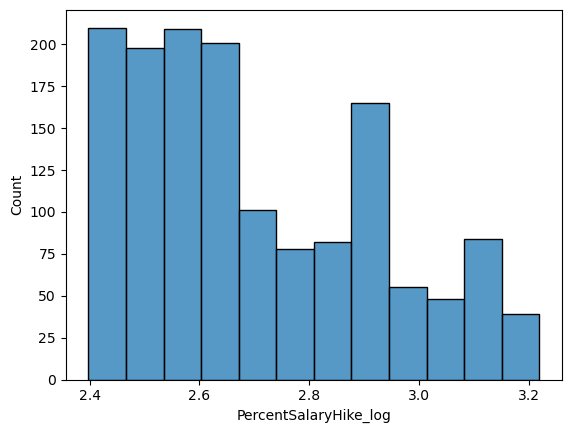

In [960]:
sns.histplot(data=df, x="PercentSalaryHike_log")

In [961]:
df['MonthlyIncome_feats'] = pd.cut(df['MonthlyIncome'], 3, labels=["low", "medium", "high"])
df['DistanceFromHome_feats'] = pd.cut(df['DistanceFromHome'], 3, labels=["close", "medium", "far"])
df['Age_feats'] = pd.cut(df['Age'], 3, labels=["young", "average", "old"])

df.nunique()


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
RelationshipSatisfaction       4
StockOptionLevel               4
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsSinceLastPromotion       16
MonthlyIncome_log           1349
PercentSalaryHike_log         15
MonthlyInc

In [962]:
df.to_csv(r'dataset.csv')

In [963]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,MonthlyIncome_log,PercentSalaryHike_log,MonthlyIncome_feats,DistanceFromHome_feats,Age_feats
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,0,1,6,0,8.698347,2.397895,low,close,average
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,3,3,10,1,8.542861,3.135494,low,close,old
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,3,3,0,0,7.644919,2.708050,low,close,average
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,3,3,8,3,7.975565,2.397895,low,close,average
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,3,3,2,2,8.151333,2.484907,low,close,young


DailyRate------	Salary Level -------	similar to montlhy income?
EnvironmentSatisfaction	---------Satisfaction with the environment----------inside job satisfaction?
HourlyRate--------	Hourly Salary-------	similar to montlhy income?
JobInvolvement	------Job Involvement 1 'Low', 2 'Medium', 3 'High', 4 'Very High'--------inside job satisfaction?
RelationshipSatisfaction-------Relations Satisfaction 1 'Low', 2 'Medium', 3 'High', 4 'Very High'-------	inside job satisfaction?
WorkLifeBalance	-------Time spent between work and outside 1 'Bad', 2 'Good', 3 'Better', 4 'Best'	-------inside job satisfaction?
overtime nao faz a distinçao na classifcaçao da pessoa

In [964]:
#Lets create a dataframe with only numeric variables

#nao esquecer o de no_outliers
df_num = df[['Age','DistanceFromHome','JobSatisfaction','MonthlyIncome_log', 'NumCompaniesWorked'
             ,'PercentSalaryHike_log', 'StockOptionLevel',
                       'TrainingTimesLastYear','YearsAtCompany', 'YearsSinceLastPromotion']]

scaler = MinMaxScaler(feature_range=(0,1))
df_num_sc = pd.DataFrame(scaler.fit_transform(df_num))
df_num_sc.columns = df_num.columns
#df_bin.iloc[:,7:21] = pd.DataFrame(scaler.fit_transform(df.iloc[:,7:21]))
df_num_sc.describe()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome_log,NumCompaniesWorked,PercentSalaryHike_log,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.292590,0.576190,0.547691,0.299244,0.361921,0.264626,0.466553,0.175204,0.145850
std,0.217509,0.289531,0.367615,0.222468,0.277557,0.277989,0.284026,0.214878,0.153163,0.214829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.333333,0.354749,0.111111,0.105985,0.000000,0.333333,0.075000,0.000000
50%,0.428571,0.214286,0.666667,0.530395,0.222222,0.293749,0.333333,0.500000,0.125000,0.066667
75%,0.595238,0.464286,1.000000,0.708726,0.444444,0.599864,0.333333,0.500000,0.225000,0.200000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

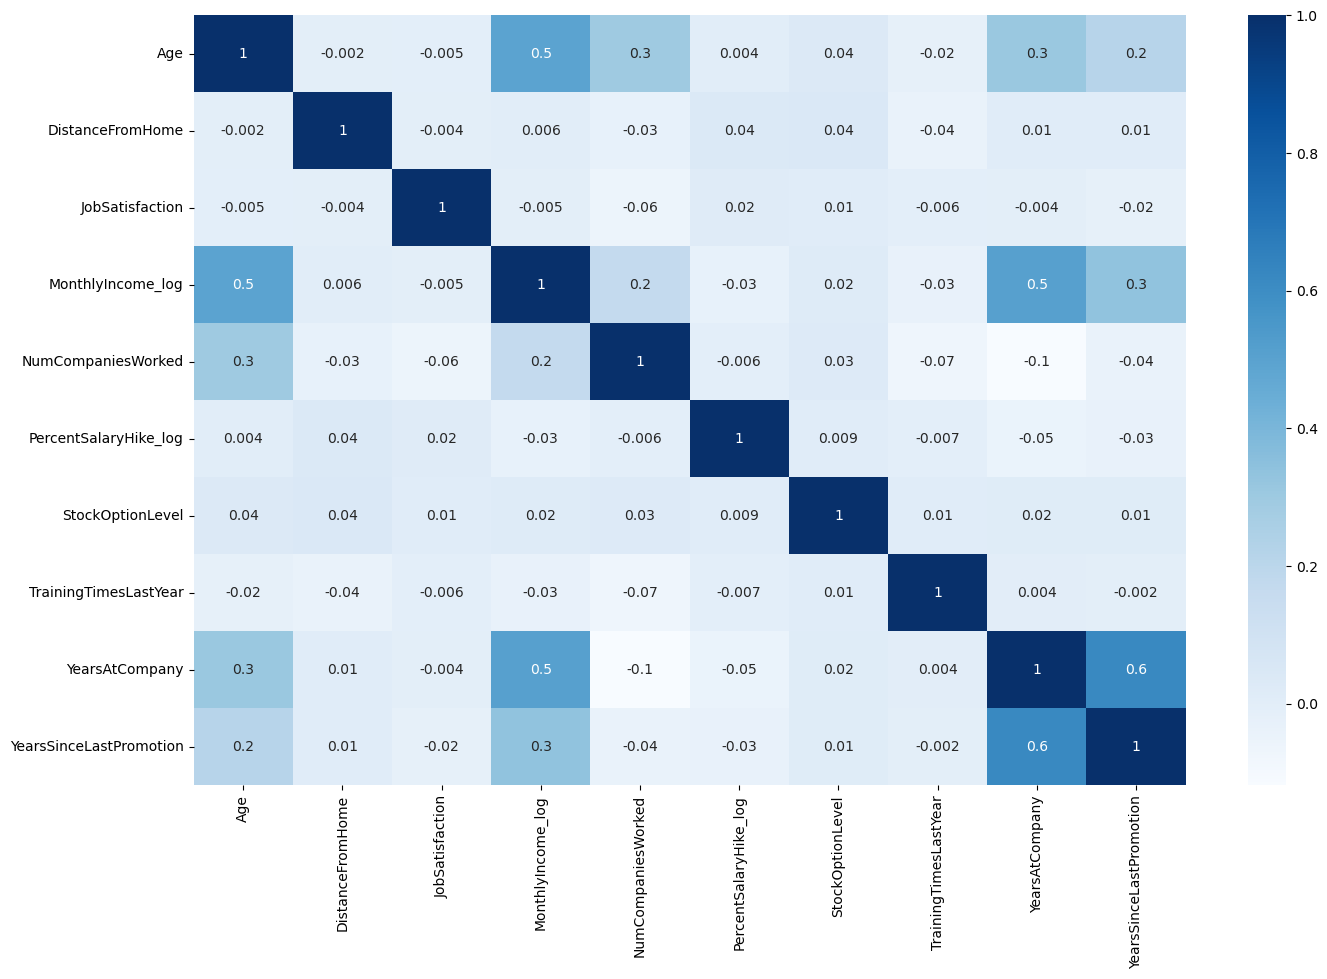

In [965]:

df_corr = df_num.corr(method = 'pearson')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, cmap="Blues", fmt = '.1g')



In [966]:
#Copy categorical data
df_cat_clusters = df[['Attrition','OverTime','BusinessTravel','MaritalStatus', 'JobRole','Gender','MonthlyIncome_feats',
                      'EducationField', 'Education'
             ,'DistanceFromHome_feats','Age_feats','JobLevel', 'Department','OverTime']]



cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = km.KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cat_bin)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8845.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8845.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8845.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8845.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8845.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 50, cost: 8026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 300, cost: 8056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...

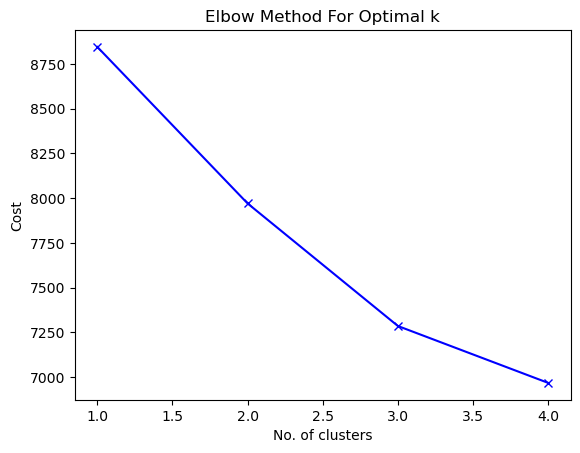

In [967]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = km.KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cat_clusters)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [968]:
kmode = km.KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cat_clusters)
clusters
kmode

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 220, cost: 8241.0
Run 1, iteration: 2/100, moves: 81, cost: 8241.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 139, cost: 8056.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 414, cost: 7888.0
Run 3, iteration: 2/100, moves: 243, cost: 7888.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 407, cost: 8074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 388, cost: 7850.0
Best run was number 5


KModes(init='random', n_clusters=2, n_init=5, verbose=1)

In [969]:
df_kmodes = df_cat_clusters
#clusters.fit(df_kmodes)

#df_kmodes = pd.DataFrame(clusters)
df_kmodes['label']= kmode.labels_


df_kmodes['label'].value_counts()


C:\Users\JFSGASPAR\AppData\Local\Temp\ipykernel_16260\679119543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmodes['label']= kmode.labels_


0    869
1    601
Name: label, dtype: int64

In [907]:
df_kmodes = df_cat_clusters.copy()
#clusters.fit(df_kmodes)

#df_kmodes = pd.DataFrame(clusters)
df_kmodes['label']= kmode.labels_


df_kmodes
df_kmodes.to_csv(r'Clusters.csv')

In [970]:
df_cat_pred = df[['Attrition','OverTime','BusinessTravel','MaritalStatus', 'JobRole','Gender','JobLevel',
             'Department','EducationField','Education']].copy()

In [971]:
df_cat_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   OverTime        1470 non-null   object
 2   BusinessTravel  1470 non-null   object
 3   MaritalStatus   1470 non-null   object
 4   JobRole         1470 non-null   object
 5   Gender          1470 non-null   object
 6   JobLevel        1470 non-null   int64 
 7   Department      1470 non-null   object
 8   EducationField  1470 non-null   object
 9   Education       1470 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 115.0+ KB


In [972]:
df_cat_bins= df_cat_pred
df_cat_bins['OverTime'] =df_cat_bins['OverTime'].astype("category").cat.codes
df_cat_bins['BusinessTravel'] =df_cat_bins['BusinessTravel'].astype("category").cat.codes
df_cat_bins['MaritalStatus'] =df_cat_bins['MaritalStatus'].astype("category").cat.codes
df_cat_bins['JobRole'] =df_cat_bins['JobRole'].astype("category").cat.codes
df_cat_bins['Department'] =df_cat_bins["Department"].astype("category").cat.codes
df_cat_bins['EducationField'] =df_cat_bins["EducationField"].astype("category").cat.codes
df_cat_bins['JobLevel'] =df_cat_bins['JobLevel'].astype("category").cat.codes
df_cat_bins['Attrition'] =df_cat_bins['Attrition'].astype("category").cat.codes
df_cat_bins['Gender'] =df_cat_bins['Gender'].astype("category").cat.codes
scaler = MinMaxScaler(feature_range=(0,1))

df_cat_bins_sc = pd.DataFrame(scaler.fit_transform(df_cat_bins))
df_cat_bins_sc.columns = df_cat_bins.columns



In [973]:
df_final = pd.concat([df_num_sc, df_cat_bins_sc], axis=1)
hr_data_final.head()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome_log,NumCompaniesWorked,PercentSalaryHike_log,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,Attrition,OverTime,BusinessTravel,MaritalStatus,JobRole,JobLevel,Department,EducationField
0,0.547619,0.000000,1.000000,0.596518,0.888889,0.000000,0.000000,0.0,0.15,0.000000,1.0,1.0,1.0,1.0,0.875,0.25,1.0,0.2
1,0.738095,0.250000,0.333333,0.544458,0.111111,0.898437,0.333333,0.5,0.25,0.066667,0.0,0.0,0.5,0.5,0.750,0.25,0.5,0.2
2,0.452381,0.035714,0.666667,0.243814,0.666667,0.377786,0.000000,0.5,0.00,0.000000,1.0,1.0,1.0,1.0,0.250,0.00,0.5,0.8
3,0.357143,0.071429,0.666667,0.354519,0.111111,0.000000,0.000000,0.5,0.20,0.200000,0.0,1.0,0.5,0.5,0.750,0.00,0.5,0.2
4,0.214286,0.035714,0.333333,0.413369,1.000000,0.105985,0.333333,0.5,0.05,0.133333,0.0,0.0,1.0,0.5,0.250,0.00,0.5,0.6


In [974]:
df_final.describe()

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome_log,NumCompaniesWorked,PercentSalaryHike_log,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,Attrition,OverTime,BusinessTravel,MaritalStatus,JobRole,Gender,JobLevel,Department,EducationField,Education
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.292590,0.576190,0.547691,0.299244,0.361921,0.264626,0.466553,0.175204,0.145850,0.161224,0.282993,0.803741,0.548639,0.557313,0.600000,0.265986,0.630272,0.449524,0.478231
std,0.217509,0.289531,0.367615,0.222468,0.277557,0.277989,0.284026,0.214878,0.153163,0.214829,0.367863,0.450606,0.332727,0.365060,0.307728,0.490065,0.276735,0.263896,0.266274,0.256041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.333333,0.354749,0.111111,0.105985,0.000000,0.333333,0.075000,0.000000,0.000000,0.000000,0.500000,0.500000,0.250000,0.000000,0.000000,0.500000,0.200000,0.250000
50%,0.428571,0.214286,0.666667,0.530395,0.222222,0.293749,0.333333,0.500000,0.125000,0.066667,0.000000,0.000000,1.000000,0.500000,0.625000,1.000000,0.250000,0.500000,0.400000,0.500000
75%,0.595238,0.464286,1.000000,0.708726,0.444444,0.599864,0.333333,0.500000,0.225000,0.200000,0.000000,1.000000,1.000000,1.000000,0.875000,1.000000,0.500000,1.000000,0.600000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [975]:
df_cat_bins['Attrition'] =df_cat_bins['Attrition'].astype("category").cat.codes

target = df_cat_bins['Attrition']
features = df_cat_bins.drop('Attrition', axis = 1)


In [976]:
def TestIndependence(X, y, var, alpha=0.05):        
    dfObserved = pd.crosstab(y, X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p < alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [977]:
for var in features:
    TestIndependence(features[var],target, var)

OverTime is IMPORTANT for Prediction
BusinessTravel is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
JobRole is IMPORTANT for Prediction
Gender is NOT an important predictor. (Discard Gender from model)
JobLevel is IMPORTANT for Prediction
Department is IMPORTANT for Prediction
EducationField is IMPORTANT for Prediction
Education is NOT an important predictor. (Discard Education from model)


In [978]:
df_final.drop(['Education','Gender' ], axis=1, inplace=True)

#### Wrapper Method - RFE (Recursive Feature Elimination)

Considering that we will use 3 categorical features, we will now decide which numerical features we shall use.

In [979]:

def rfe(X, y, model):
    nof_list=np.arange(1,17)            
    high_score=0
#Variable to store the optimum features
    nof=0           
    score_list =[]
    for n in range(len(nof_list)):
        rfe = RFE(model, n_features_to_select=nof_list[n])
        X_rfe = rfe.fit_transform(X,y)
        model.fit(X_rfe,y)
        score = model.score(X_rfe, y)
        score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
    print("Optimum number of features: %d" %nof)
    print("Score with %d features: %f" % (nof, score))
    selected_features = pd.Series(rfe.support_, index = df_num_sc.columns)
    #print(selected_features)
    print(selected_features.sort_values())
rfe(df_num_sc,target,LogisticRegression())    

Optimum number of features: 16
Score with 16 features: 0.841497
Age                        True
DistanceFromHome           True
JobSatisfaction            True
MonthlyIncome_log          True
NumCompaniesWorked         True
PercentSalaryHike_log      True
StockOptionLevel           True
TrainingTimesLastYear      True
YearsAtCompany             True
YearsSinceLastPromotion    True
dtype: bool


In [980]:
df_final.corrwith(df_final['Attrition'])

Age                       -0.159205
DistanceFromHome           0.077924
JobSatisfaction           -0.103481
MonthlyIncome_log         -0.198210
NumCompaniesWorked         0.043494
PercentSalaryHike_log     -0.017622
StockOptionLevel          -0.137145
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
YearsSinceLastPromotion   -0.033019
Attrition                  1.000000
OverTime                   0.246118
BusinessTravel             0.000074
MaritalStatus              0.162070
JobRole                    0.067151
JobLevel                  -0.169105
Department                 0.063991
EducationField             0.026846
dtype: float64

<AxesSubplot:>

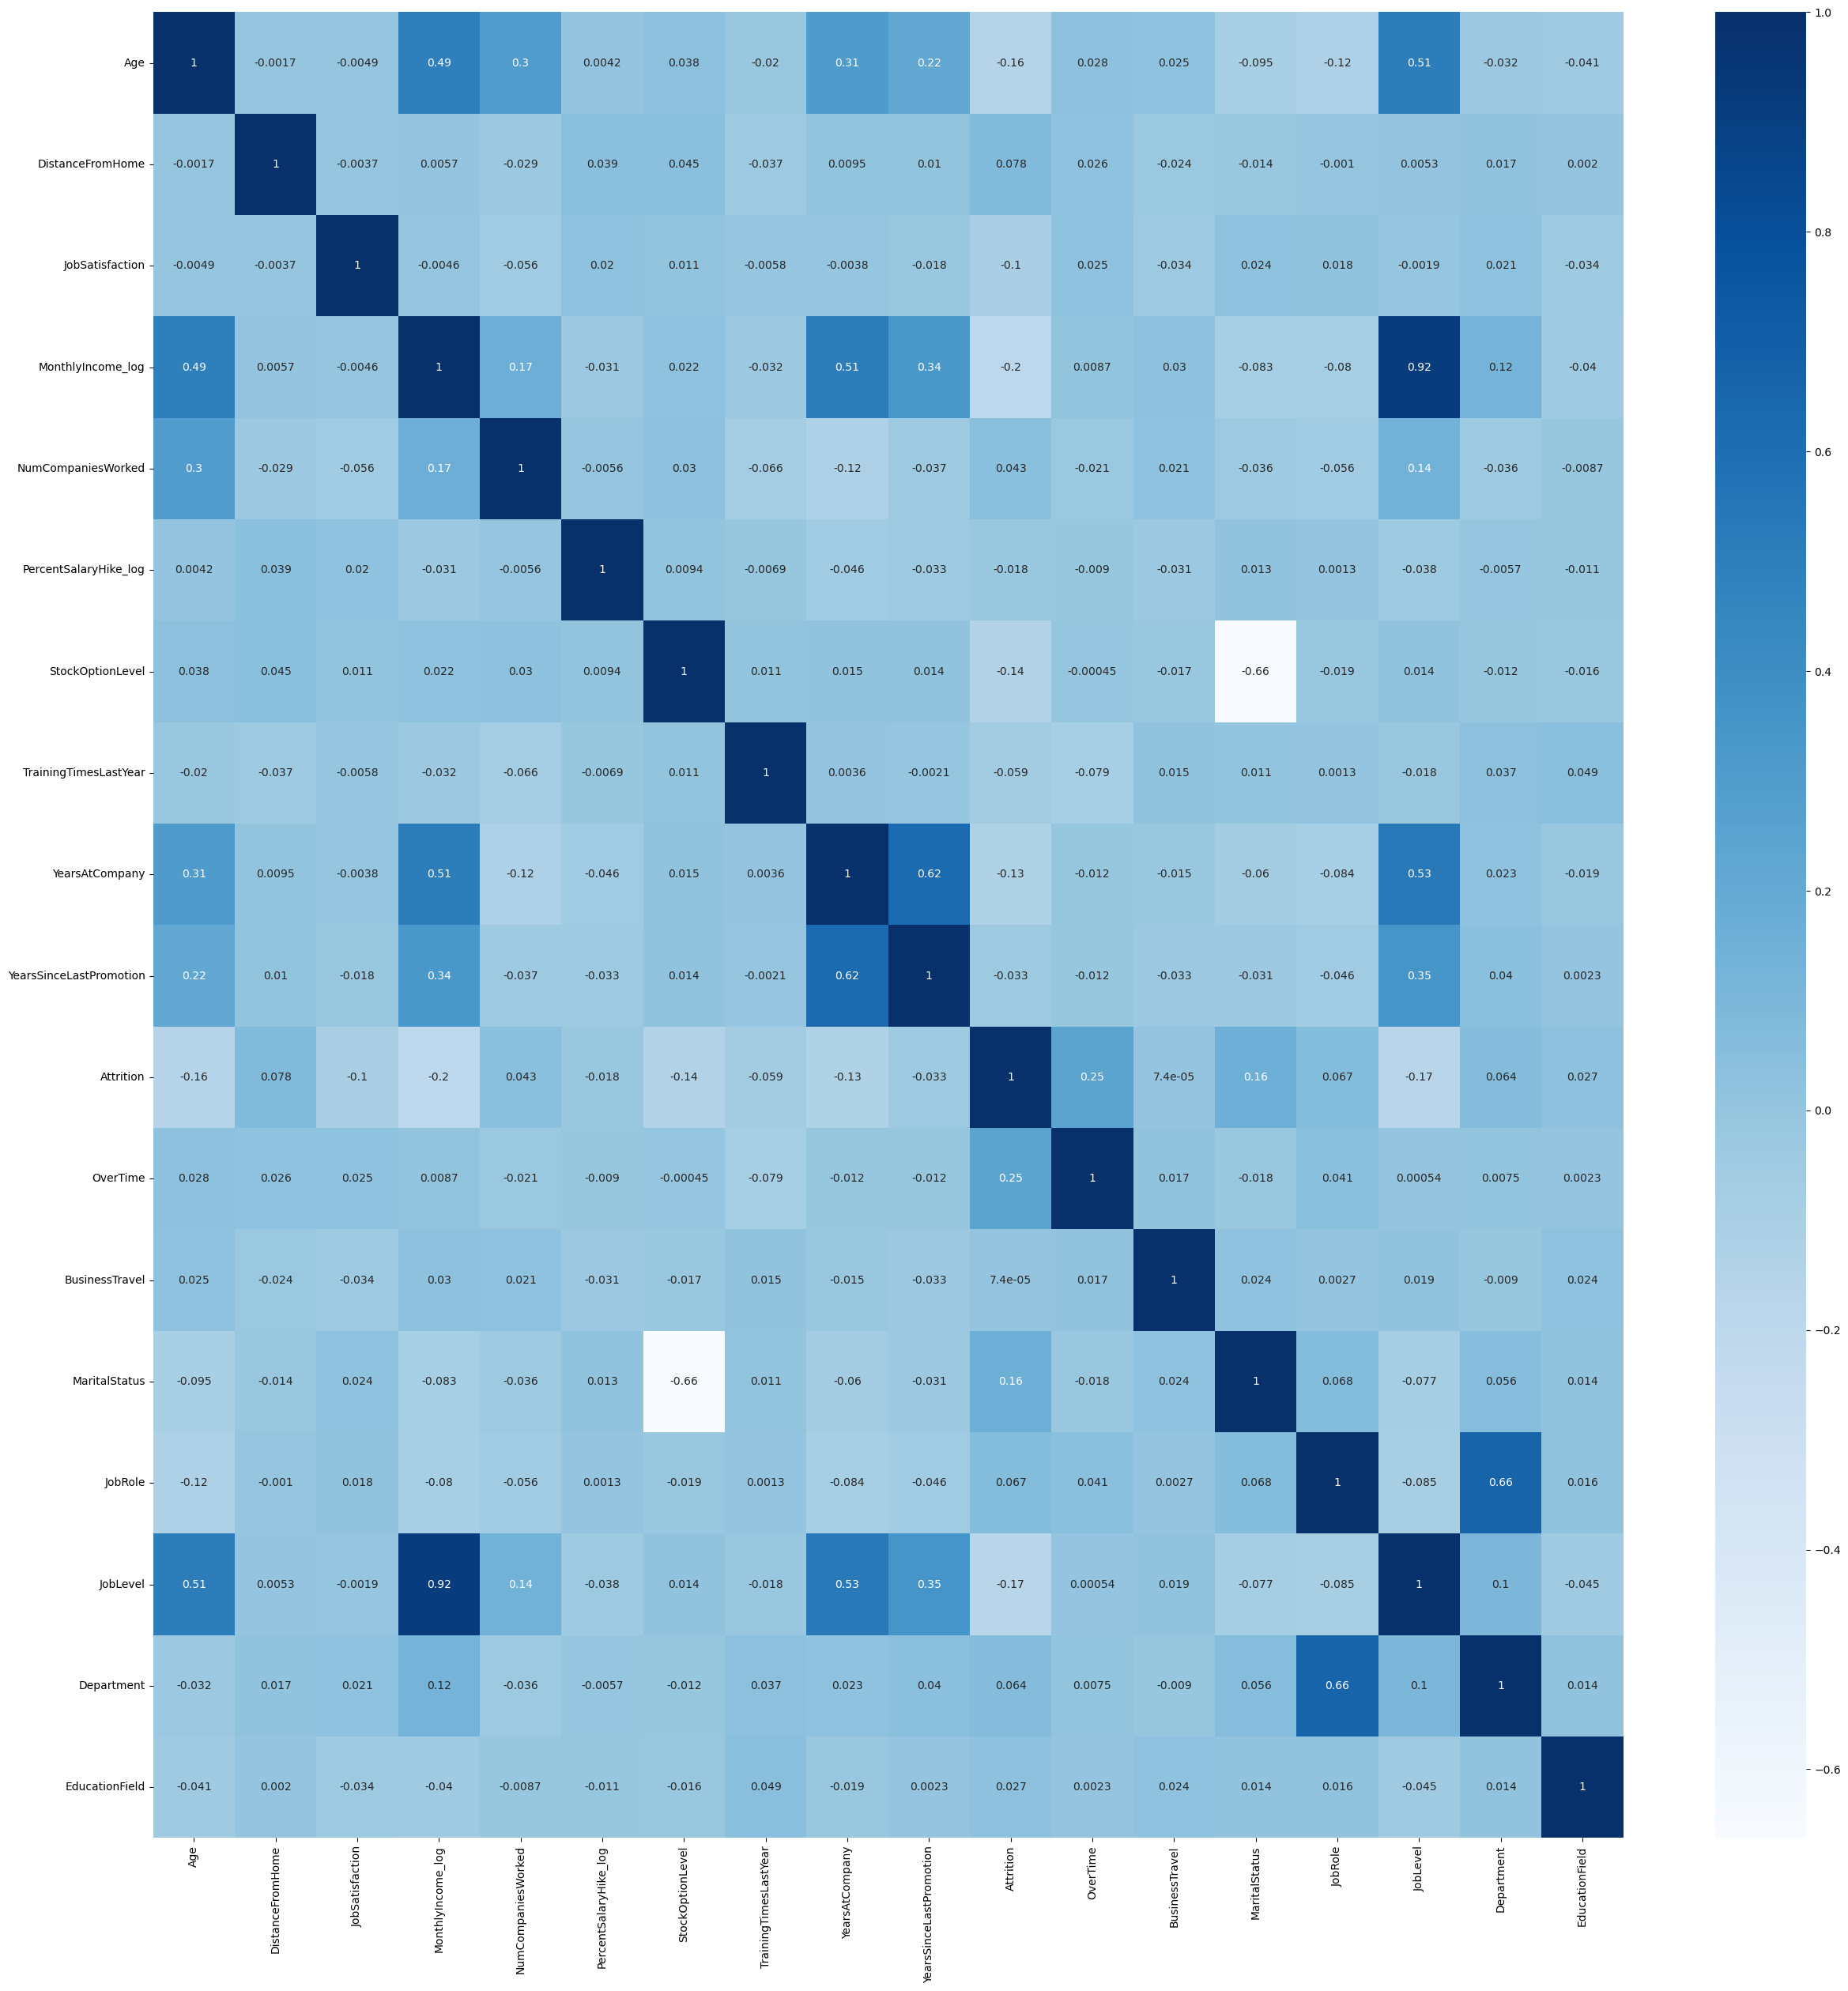

In [981]:
df_final_corr = df_final.corr(method = 'pearson')
figure = plt.figure(figsize=(30,30))
sns.heatmap(df_final_corr, annot=True, cmap="Blues")


In [982]:
df_final.drop(['JobLevel'], axis=1, inplace=True)
#df_final.drop(['YearsAtCompany'], axis=1, inplace=True)
#df_final.drop(['OverTime'], axis=1, inplace=True)

In [983]:

target = df_final['Attrition']
features = df_final.drop('Attrition', axis = 1)

In [984]:
target

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [985]:
features

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome_log,NumCompaniesWorked,PercentSalaryHike_log,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,OverTime,BusinessTravel,MaritalStatus,JobRole,Department,EducationField
0,0.547619,0.000000,1.000000,0.596518,0.888889,0.000000,0.000000,0.000000,0.150,0.000000,1.0,1.0,1.0,0.875,1.0,0.2
1,0.738095,0.250000,0.333333,0.544458,0.111111,0.898437,0.333333,0.500000,0.250,0.066667,0.0,0.5,0.5,0.750,0.5,0.2
2,0.452381,0.035714,0.666667,0.243814,0.666667,0.377786,0.000000,0.500000,0.000,0.000000,1.0,1.0,1.0,0.250,0.5,0.8
3,0.357143,0.071429,0.666667,0.354519,0.111111,0.000000,0.000000,0.500000,0.200,0.200000,1.0,0.5,0.5,0.750,0.5,0.2
4,0.214286,0.035714,0.333333,0.413369,1.000000,0.105985,0.333333,0.500000,0.050,0.133333,0.0,1.0,0.5,0.250,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.785714,1.000000,0.313164,0.444444,0.530242,0.333333,0.500000,0.125,0.000000,0.0,0.5,0.5,0.250,0.5,0.6
1466,0.500000,0.178571,0.000000,0.767639,0.444444,0.377786,0.333333,0.833333,0.175,0.066667,0.0,1.0,0.5,0.000,0.5,0.6
1467,0.214286,0.107143,0.333333,0.604740,0.111111,0.728199,0.333333,0.000000,0.150,0.000000,1.0,1.0,0.5,0.500,0.5,0.2
1468,0.738095,0.035714,0.333333,0.561011,0.222222,0.293749,0.000000,0.500000,0.225,0.000000,0.0,0.5,0.5,0.875,1.0,0.6


In [986]:
df_final

,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome_log,NumCompaniesWorked,PercentSalaryHike_log,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,Attrition,OverTime,BusinessTravel,MaritalStatus,JobRole,Department,EducationField
0,0.547619,0.000000,1.000000,0.596518,0.888889,0.000000,0.000000,0.000000,0.150,0.000000,1.0,1.0,1.0,1.0,0.875,1.0,0.2
1,0.738095,0.250000,0.333333,0.544458,0.111111,0.898437,0.333333,0.500000,0.250,0.066667,0.0,0.0,0.5,0.5,0.750,0.5,0.2
2,0.452381,0.035714,0.666667,0.243814,0.666667,0.377786,0.000000,0.500000,0.000,0.000000,1.0,1.0,1.0,1.0,0.250,0.5,0.8
3,0.357143,0.071429,0.666667,0.354519,0.111111,0.000000,0.000000,0.500000,0.200,0.200000,0.0,1.0,0.5,0.5,0.750,0.5,0.2
4,0.214286,0.035714,0.333333,0.413369,1.000000,0.105985,0.333333,0.500000,0.050,0.133333,0.0,0.0,1.0,0.5,0.250,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.785714,1.000000,0.313164,0.444444,0.530242,0.333333,0.500000,0.125,0.000000,0.0,0.0,0.5,0.5,0.250,0.5,0.6
1466,0.500000,0.178571,0.000000,0.767639,0.444444,0.377786,0.333333,0.833333,0.175,0.066667,0.0,0.0,1.0,0.5,0.000,0.5,0.6
1467,0.214286,0.107143,0.333333,0.604740,0.111111,0.728199,0.333333,0.000000,0.150,0.000000,0.0,1.0,1.0,0.5,0.500,0.5,0.2
1468,0.738095,0.035714,0.333333,0.561011,0.222222,0.293749,0.000000,0.500000,0.225,0.000000,0.0,0.0,0.5,0.5,0.875,1.0,0.6


In [987]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 15, stratify = target)

In [988]:
def compare_models(X, y, model):
    skf = StratifiedKFold(n_splits = 5)
    score_train = []
    score_val = []
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train,average='micro'))
        score_val.append(f1_score(y_val, predictions_val,average='micro'))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return str(avg_train) + '+/-' + str(std_train),str(avg_val) + '+/-' + str(std_val)


In [989]:
def show_results(df, X, y, *args):
    count = 0
    for arg in args:
        avg_train, avg_test = compare_models(X, y, arg)
        df.iloc[count] = avg_train, avg_test
        count+=1
    
    return df

In [990]:
model_LR = LogisticRegression()
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3)
model_RF = RandomForestClassifier(max_depth = 3)
model_MLP = MLPClassifier()
model_GNB = GaussianNB()

df = pd.DataFrame(columns = ['Train','Validation'], index = ['Logistic Regression','DecisionTreeClassifier','RF','KNN','MLP','GaussianNB'])
show_results(df, features, target, model_LR, model_DT, model_RF, model_KNN, model_MLP, model_GNB)

C:\Users\JFSGASPAR\Anaconda3\envs\environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JFSGASPAR\Anaconda3\envs\environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JFSGASPAR\Anaconda3\envs\environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\JFSGASPAR\Anaconda3\envs\environment\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

,Train,Validation
Logistic Regression,0.861+/-0.0,0.861+/-0.01
DecisionTreeClassifier,0.86+/-0.0,0.848+/-0.01
RF,0.849+/-0.0,0.846+/-0.0
KNN,0.869+/-0.0,0.841+/-0.01
MLP,0.884+/-0.0,0.86+/-0.01
GaussianNB,0.86+/-0.0,0.854+/-0.01


In [991]:
DT_importance = model_DT.fit(X_train, y_train).feature_importances_
RF_importance = model_RF.fit(X_train, y_train).feature_importances_


<AxesSubplot:xlabel='Value', ylabel='Col'>

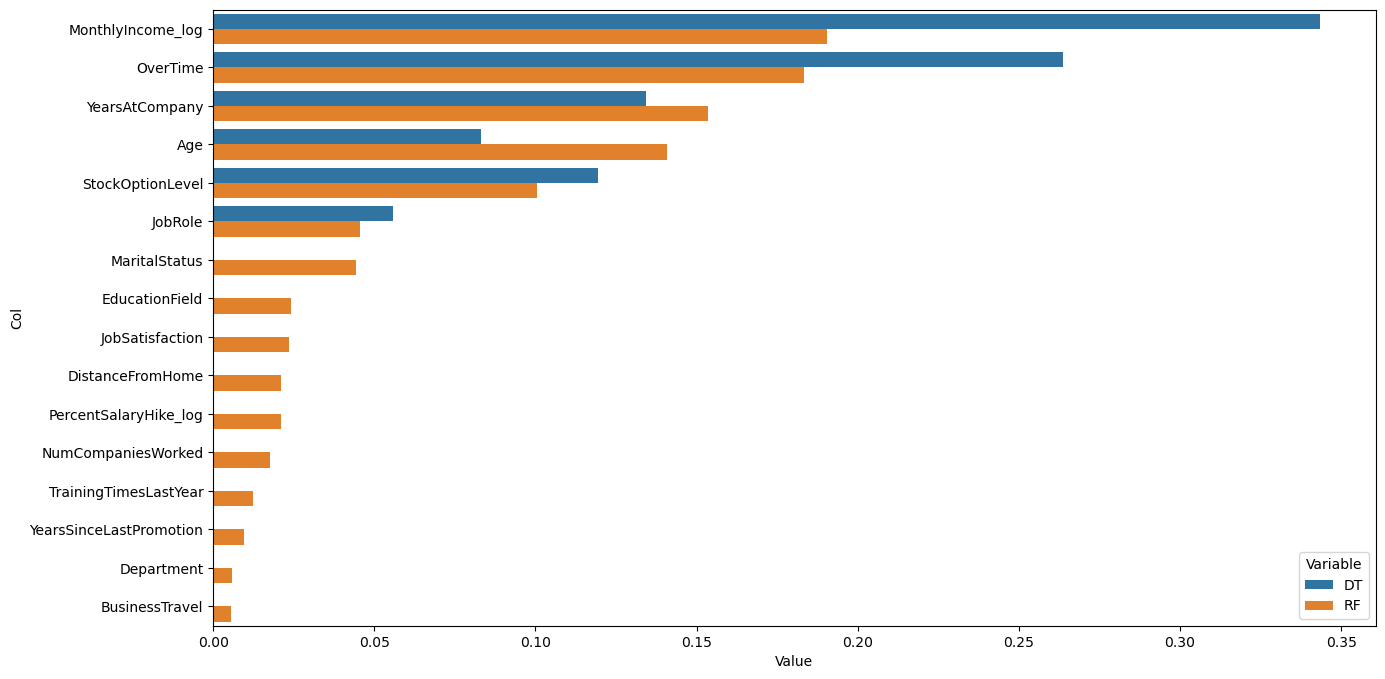

In [992]:
zippy = pd.DataFrame(zip(DT_importance, RF_importance), columns = ['DT','RF'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)

tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [993]:
tidy.to_csv(r'Features_Importance.csv')